In [ ]:
#Objective: 
#Build a model to predict whether a person is at risk of heart disease based on their health data.

In [9]:
pip install pandas matplotlib seaborn scikit-learn


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [3]:
# Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\Zahra\Desktop\Developers hub internship AI-ML\heart_cleveland_upload.csv")

In [5]:
# Step 3: Initial Inspection
print(df.shape)
print(df.info())
print(df.isnull().sum())  # check missing values
print(df.describe())

(297, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal    

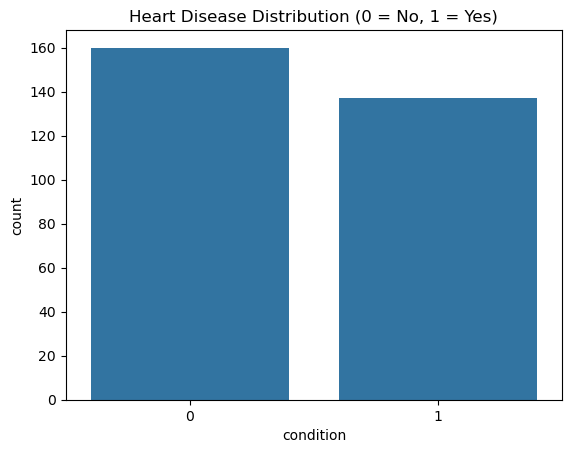

In [13]:
# Step 4: EDA (Exploratory Data Analysis)
sns.countplot(data=df, x='condition')
plt.title('Heart Disease Distribution (0 = No, 1 = Yes)')
plt.show()

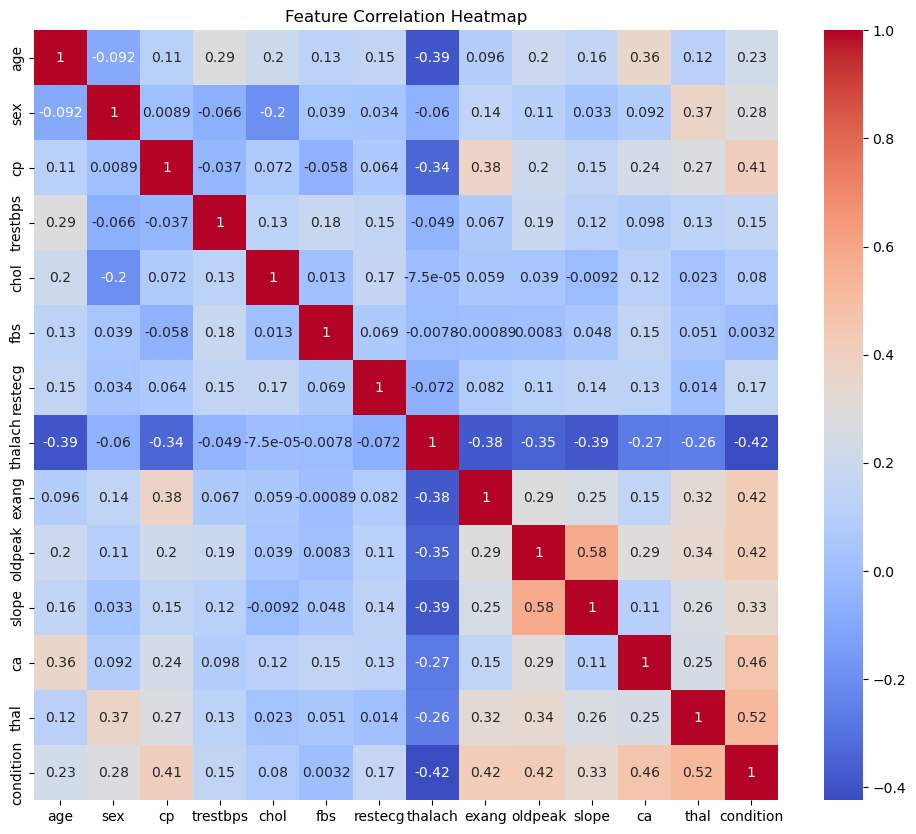

In [15]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [19]:
# Step 5: Data Preprocessing
X = df.drop('condition', axis=1)
y = df['condition']

In [21]:
#Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
# Step 7a: Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [27]:
# Step 7b: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

In [29]:
# Step 8: Evaluation Metrics
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("Decision Tree", y_test, dt_preds)


Logistic Regression Evaluation:
Accuracy: 0.7333333333333333
Confusion Matrix:
 [[23  9]
 [ 7 21]]
ROC-AUC: 0.734375

Decision Tree Evaluation:
Accuracy: 0.7666666666666667
Confusion Matrix:
 [[24  8]
 [ 6 22]]
ROC-AUC: 0.7678571428571428


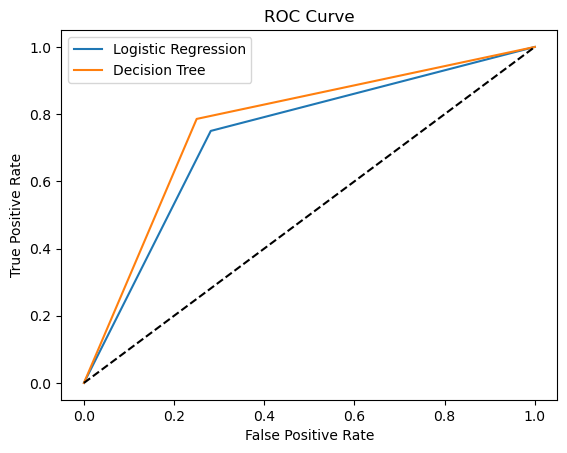

In [31]:
# Step 9: ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_preds)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_preds)

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


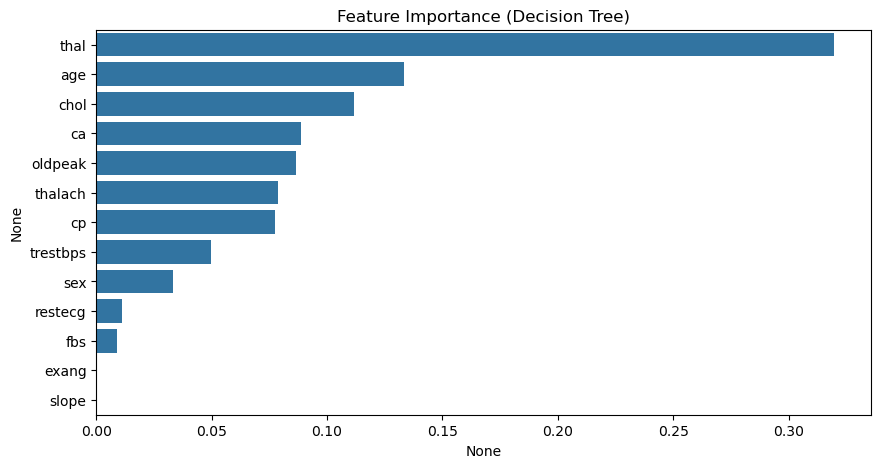

In [35]:
# Step 10: Feature Importance (Decision Tree)
importances = dt.feature_importances_
feature_names = df.drop('condition', axis=1).columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Feature Importance (Decision Tree)')
plt.show()

In [ ]:
#  Final Insights – Task 3: Heart Disease Prediction

#1. Clean Data: The dataset had no missing values and required minimal preprocessing.
#2. EDA: Target variable is balanced enough for binary classification. Age, chest pain type, and cholesterol showed meaningful patterns.
#3. Model Performance**:
#    Logistic Regression was fast and had decent accuracy.
#    Decision Tree captured feature interactions and performed slightly better in ROC-AUC.
# 4. Important Features:
#    Chest Pain Type (`cp`)
#    Maximum Heart Rate (`thalach`)
#    ST Depression (`oldpeak`)
#5. Conclusion: Both models are effective for risk prediction. Decision Tree allows interpretability via feature importance.

